### Лабораторная работа 1. Бинарная классификация

#### Выполнила: Дорофеева Елена

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#data=pd.read_csv(r'../input/car-insurance-data/Car_Insurance_Claim.csv')

#### 1. Загрузите данные

In [ ]:
data = pd.read_csv("Car_Insurance_Claim.csv")

In [ ]:
data.head()

In [ ]:
data.shape

#### 2. Опишите задачу словами. В том числе напишите, что значит каждый признак

В данной работе используются данные по страхованию автомобилей. Задача состоит в том, чтобы предсказать, воспользуется ли клиент страховкой, т.е. нужно ли будет страховой компании выплачивать клиенту деньги (столбец OUTCOME = 1, если воспользуется; 0, иначе).

Признаки, содержащиеся в данных:
1. Уникальный ID (числовой признак ID)
2. Возраст (категориальный признак AGE)
3. Пол (категориальный признак GENDER)
4. Расовая принадлежность (категориальный признак RACE)
5. Опыт вождения машины (категориальный признак DRIVING_EXPERIENCE)
6. Уровень образования (категориальный признак EDUCATION)
7. Размер заработка (категориальный признак INCOME)
8. Кредитный рейтинг (числовой признак CREDIT_SCORE)
9. Владение транспортным средством (категориальный признак VEHICLE_OWNERSHIP)
10. Год выпуска автомобиля (категориальный признак VEHICLE_YEAR)
11. Женат ли клиент (категориальный признак MARRIED)
12. Есть ли дети(категориальный признак CHILDREN)
13. Почтовый код (числовой признак POSTAL_CODE)
14. Годовой пробег (числовой признак ANNUAL_MILEAGE)
15. Тип автомобиля (категориальный признак VEHICLE_TYPE)
16. Число штрафов за превышение скорости (числовой признак SPEEDING_VIOLATIONS)
17. Число штрафов за вождение в нетрезвом виде (числовой признак DUIS)
18. Число аварий в прошлом, т.е. на прошлой машине (числовой признак PAST_ACCIDENTS)

Признак, являющийся целевой переменной (то, что требуется предсказать в задании):
19. Потребуется ли страховой выплачивать страховку клиенту (категориальный признак OUTCOME)

#### 3. Разбейте данные на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
X_test

In [ ]:
y_test

#### 4. Визуализируйте данные из обучающей выборки

In [ ]:
#чтобы посмотреть зависимость между признаками и целевой переменной, добавим ее назад в данные
X_train['OUTCOME'] = y_train

In [ ]:
X_train.describe()

In [ ]:
sns.set_style('whitegrid')
numbers = pd.Series(X_train.columns)
data[numbers].hist(figsize=(20,14))
plt.show()

In [ ]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(X_train, diag_kind="kde", corner=True, height=3)
plt.show()

In [ ]:
sns.catplot(x="RACE", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="GENDER", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="MARRIED", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="CHILDREN", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="AGE", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="DRIVING_EXPERIENCE", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="INCOME", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="VEHICLE_OWNERSHIP", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="EDUCATION", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="VEHICLE_YEAR", kind="count", palette="muted", data=X_train)

In [ ]:
sns.catplot(x="VEHICLE_TYPE", kind="count", palette="muted", data=X_train)

Посмотрим, есть ли какое-то половое преимущество по признакам.

In [ ]:
sns.histplot(binwidth=0.5, x="RACE", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="INCOME", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="MARRIED", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="CHILDREN", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="VEHICLE_OWNERSHIP", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="EDUCATION", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="VEHICLE_YEAR", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="AGE", hue="GENDER", data=X_train, stat="count", multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="VEHICLE_TYPE", hue="GENDER", data=X_train, stat="count",multiple="stack")

In [ ]:
sns.histplot(binwidth=0.5, x="DRIVING_EXPERIENCE", hue="GENDER", data=X_train, stat="count", multiple="stack")

Как видим, все признаки делятся почти ровно пополам по каждому полу, значит, пол никак не коррелирует ни с другими признаками, ни с целевой переменной.

In [ ]:
sns.catplot(y="GENDER",x="CREDIT_SCORE", kind="violin", split=True, data=X_train)

In [ ]:
sns.catplot(y="GENDER",x="ANNUAL_MILEAGE", kind="violin", split=True, data=X_train)

In [ ]:
sns.catplot(y="GENDER",x="SPEEDING_VIOLATIONS", kind="violin", split=True, data=X_train)

In [ ]:
sns.catplot(y="GENDER",x="DUIS", kind="violin", split=True, data=X_train)

In [ ]:
sns.catplot(y="GENDER",x="PAST_ACCIDENTS", kind="violin", split=True, data=X_train)

Если смотреть по разбросу данных, то женщины меньше попадают в аварии (соответственно, меньше получают штрафы). Это может повлиять на то, понадобится им страховка или нет.

In [ ]:
X_train.groupby(["OUTCOME"]).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=X_train.corr().round(5), cmap="coolwarm", annot=True)

Как видно из матрицы корреляций, числовые признаки сильно не коррелируют друг с другом, но можно заметить, что зависимость есть у признаков DUIS, PAST_ACCIDENTS и SPEEDING_VIOLATIONS, что логично, так как все они отвечают за число штрафов у клиента. Отрицательная корреляция также несет в себе информацию. Так, если у клиента есть семья, то пробег у машины будет меньше (возможно, у людей меньше свободного времени на автомобильные путешествия).

Посмотрим, как признаки связаны с целевой переменной.

In [ ]:
sns.catplot(y="GENDER", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Женщины реже пользуются страховкой (может быть связано с тем, что они попадают в меньшее число аварий)

In [ ]:
sns.catplot(y="RACE", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Раса не влияет на использование страховки, так как и там, и там те, кто пользуются и не пользуются страховкой делятся, как 1:2.

In [ ]:
sns.catplot(y="MARRIED", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

In [ ]:
sns.catplot(y="CHILDREN", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Семейные клиенты реже пользуются страховкой (возможно из-за того, что ездят они меньше, так как у них пробег у машин ниже)

In [ ]:
sns.catplot(y="VEHICLE_TYPE", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Аналогично расовому признаку, зависимости от типа машины нет.

In [ ]:
sns.catplot(y="VEHICLE_YEAR", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Зависимость ожидаемая, новые машины реже попадают в аварии.

In [ ]:
sns.catplot(y="EDUCATION", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

In [ ]:
sns.catplot(y="INCOME", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Чем выше уровень образования и жизни, тем ниже вероятность попасть в аварию, а соответственно и использовать страховку.

In [ ]:
sns.catplot(y="AGE", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Ожидаемая зависимость, что чем старше клиент, тем аккуратнее он водит машину.

In [ ]:
sns.catplot(y="VEHICLE_OWNERSHIP", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Логично, что если клиент водит не свою машину, то он с большей вероятностью воспользуется страховкой.

In [ ]:
sns.catplot(y="DRIVING_EXPERIENCE", hue="OUTCOME", kind="count", palette="pastel", edgecolor=".6", data=X_train)

Опять ожидаемо, что с большим стажем машину водят аккуратнее.

In [ ]:
sns.catplot(x="CREDIT_SCORE" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

In [ ]:
sns.catplot(x="ANNUAL_MILEAGE" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

In [ ]:
sns.catplot(x="DUIS" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

In [ ]:
sns.catplot(x="SPEEDING_VIOLATIONS" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

In [ ]:
sns.catplot(x="PAST_ACCIDENTS" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

In [ ]:
sns.catplot(x="MARRIED" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

In [ ]:
sns.catplot(x="CHILDREN" ,y="GENDER", hue="OUTCOME", kind="bar", data=X_train)

Все графики выше подтверждают, что сильного различия между мужчинами и женщинами по признакам нет, и пол почти никак не влияет на вероятность использования страховки.

#### 5. Обработать пропущенные значения (или убедиться, что их нет)

In [ ]:
A = X_train.isnull()

In [ ]:
print('Missing values by features:', A.sum(), sep='\n')

Так как пропуски содержатся только в числовых признаках, заполним медианами пропущенные значения в признаках CREDIT_SCORE и ANNUAL_MILEAGE.

In [ ]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

In [ ]:
X_train[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imp_num.transform(X_train[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

#### 6. Исключить нерелевантные признаки (объяснить, как вы их нашли)

Признак ID является бесполезным для обучения, так как он не несет в себе никакой информации о клиенте, поэтому его мы удалим.

In [ ]:
X_train=X_train.drop(["ID"],axis=1)

In [ ]:
X_train.duplicated().sum()

В данных есть дупликаты, их нужно удалить.

In [ ]:
X_train=X_train.drop_duplicates()

По графикам, построенным выше, мы заметили, что пол, раса и тип автомобиля не влияют ни на другие признаки, ни на целевую переменную, поэтому эти признаки можно удалить. Признаки PAST_ACCIDENTS, DUIS и SPEEDING_VIOLATIONS можно объединить в признак PENALTIES.

In [ ]:
X_train=X_train.drop(["GENDER"],axis=1)
X_train=X_train.drop(["RACE"],axis=1)
X_train=X_train.drop(["VEHICLE_TYPE"],axis=1)

In [ ]:
X_train.head()

#### 7. Если необходимо, то обработать коррелированные признаки

По графикам, построенным выше, мы заметили, что пол, раса и тип автомобиля не влияют ни на другие признаки, ни на целевую переменную, поэтому эти признаки можно удалить. Признаки PAST_ACCIDENTS, DUIS и SPEEDING_VIOLATIONS можно объединить в признак PENALTIES.

In [ ]:
X_train['PENALTIES'] = X_train['PAST_ACCIDENTS'] + X_train['DUIS'] + X_train['SPEEDING_VIOLATIONS']

In [ ]:
X_train=X_train.drop(["PAST_ACCIDENTS"],axis=1)
X_train=X_train.drop(["DUIS"],axis=1)
X_train=X_train.drop(["SPEEDING_VIOLATIONS"],axis=1)

In [ ]:
X_train.head()

#### 8. Обработать категориальные признаки

Переведем категориальные признаки в численные.

In [ ]:
from sklearn import preprocessing

In [ ]:
df = X_train

In [ ]:
numb = ["CREDIT_SCORE","VEHICLE_OWNERSHIP","MARRIED","CHILDREN","PENALTIES","POSTAL_CODE","ANNUAL_MILEAGE", "OUTCOME"]

In [ ]:
df = df.drop(numb, axis=1)
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
X_train = X_train.drop(["AGE","EDUCATION","DRIVING_EXPERIENCE","INCOME","VEHICLE_YEAR"],axis=1)

In [ ]:
X_train = pd.concat([X_train, df], axis=1)

In [ ]:
X_train.head()

#### 8*. Обработаем выбросы.

Так как теперь все признаки числовые, а данные находятся в многомерном пространстве, можем найти выбросы с помощью расстояния Махалонобиса.

In [ ]:
def MahalanobisDist(y, data, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [ ]:
def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(y=data, data=data)
  

    std = np.std(MD)
    k = 4. * std if extreme else 3. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return outliers

In [ ]:
outliers_indices = MD_detectOutliers(X_train, verbose=True)

print("Outliers Indices:" , outliers_indices)

In [ ]:
len(outliers_indices)

Удалим все найденные выбросы

In [82]:
X_train = X_train.reset_index(drop=True)

In [83]:
X_train = X_train.drop(index = outliers_indices)

Также удалим добавленные признак OUTCOME

In [84]:
y_train = X_train["OUTCOME"]

In [85]:
X_train=X_train.drop(["OUTCOME"],axis=1)

#### 9. Провести масштабирование (или объяснить, почему в вашем случае она не нужна)

In [86]:
X_train.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PENALTIES,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR
count,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000
mean,0.516805,0.699606,0.498470,0.689695,18731.280426,11722.780936,2.786037,1.480834,1.064859,0.987174,1.554875,0.699898
std,0.129441,0.458463,0.500034,0.462652,16681.735259,2642.684201,3.498602,1.023680,0.990048,0.898563,1.011637,0.458335
min,0.060867,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431402,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.525494,1.000000,0.000000,1.000000,10238.000000,12000.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,0.605808,1.000000,1.000000,1.000000,32765.000000,13000.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,19.000000,3.000000,3.000000,2.000000,3.000000,1.000000


Так как признаки POSTAL_CODE и ANNUAL_MILEAGE принимают значения от 10000 и 2000 до 92000 и 22000 соответственно, требуется масштабирование данных, так как я планирую в качестве методов классификации использовать логистическую регрессию. Несмотря на то, что, результаты работы регрессии не зависят от нормализации данных, при применении регуляризации для предотвращения переобучения данные должны быть нормализованы.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [88]:
X_train.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PENALTIES,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR
count,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03,6.861000e+03
mean,3.246686e-16,4.861291e-16,-3.098462e-16,-5.200782e-17,-3.117233e-16,8.615111e-17,-4.268234e-16,-1.479326e-16,-5.650632e-17,-1.760887e-16,3.169014e-16,9.278558e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-3.522631e+00,-1.526095e+00,-9.969439e-01,-1.490852e+00,-5.091736e-01,-3.679399e+00,-7.963866e-01,-1.446685e+00,-1.075642e+00,-1.098694e+00,-1.537101e+00,-1.527154e+00
25%,-6.598297e-01,-1.526095e+00,-9.969439e-01,-1.490852e+00,-5.091736e-01,-6.519532e-01,-7.963866e-01,-4.697454e-01,-1.075642e+00,-1.098694e+00,-5.485325e-01,-1.527154e+00
50%,6.712991e-02,6.552671e-01,-9.969439e-01,6.707574e-01,-5.091736e-01,1.049082e-01,-2.246881e-01,-4.697454e-01,-6.551610e-02,1.427507e-02,4.400363e-01,6.548127e-01
75%,6.876513e-01,6.552671e-01,1.003065e+00,6.707574e-01,8.413239e-01,4.833389e-01,3.470104e-01,5.071940e-01,9.446096e-01,1.127244e+00,4.400363e-01,6.548127e-01
max,3.430503e+00,6.552671e-01,1.003065e+00,6.707574e-01,4.398527e+00,3.889215e+00,4.634749e+00,1.484133e+00,1.954735e+00,1.127244e+00,1.428605e+00,6.548127e-01


Посмотрим, как выглядят данные после выполненных преобразований.

<Figure size 800x640 with 0 Axes>

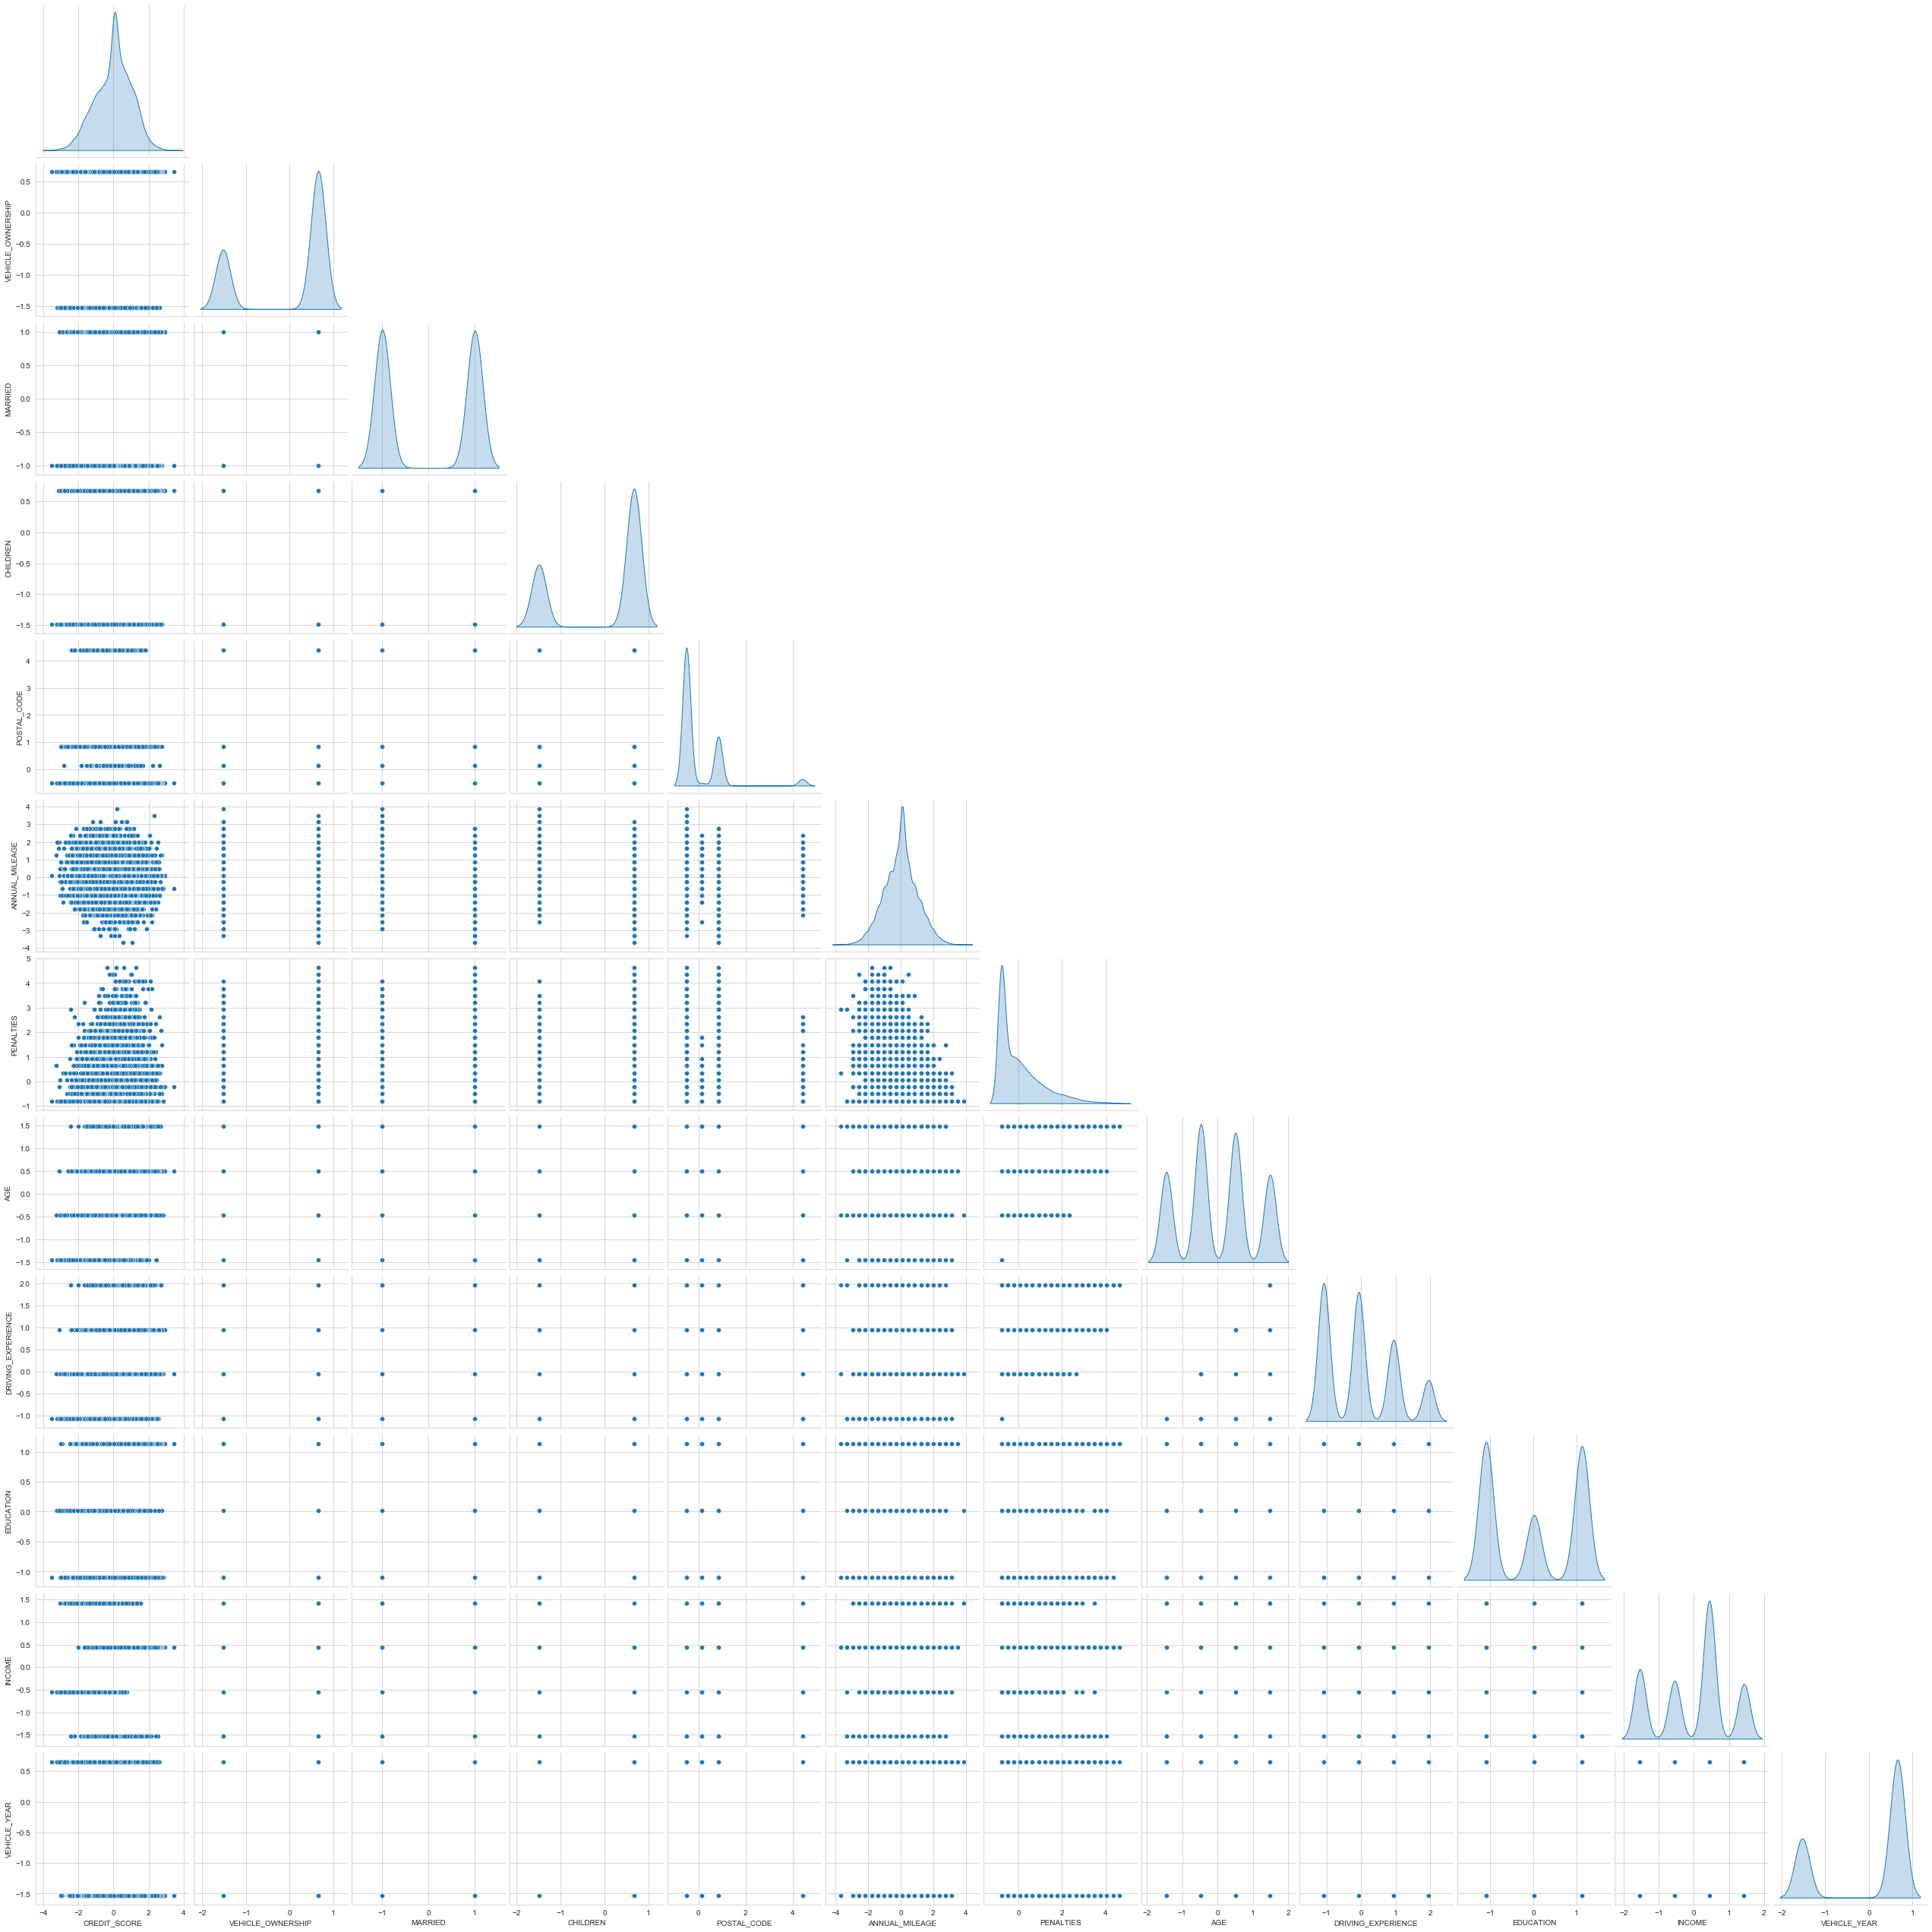

In [89]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(X_train, diag_kind="kde", corner=True, height=3)
plt.show()

#### 12. Попробуйте как минимум 3 метода классификации (регрессии). Объясните ваш выбор. Найдите значения метрик на обучающей и тестовой выборке. Сделайте вывод.

1. Логистическая регрессия - это алгоритм классификации, используемый для определения вероятности успеха события и неудачи события. Этот алгоритм проще реализовать, интепретировать и эффективно обучать. Также она менее склонна к переобучению, но она может переобучаться в многомерных наборах данных. В этом случае можно применить регуляризацию, но для этого данные должны быть нормализованными.

2. Дерево решений представляет собой иерархическую древовидную структуру, состоящую из правила вида «Если …, то ...». За счет обучающего множества правила генерируются автоматически в процессе обучения. Одним из главных преимуществ является то, что деревья решений формируют четкие и понятные правила классификации. Например, «если возраст < 40 и нет собственной машины, то клиенту понадобится страховка». То есть деревья решений хорошо и быстро интерпретируются. Также они легко визуализируются, то есть могут «интерпретироваться» не только как модель в целом, но и как прогноз для отдельного тестового субъекта, и не требуется много параметров модели.

3. K-ближайших соседей - один из самых распространенных методов классификации. В отличие от прдыдущих методов, здесь алгоритм расчитывает расстояние между объектами, поэтому на вход обязательны нормированные данные.

3. Случайный лес независимо строит случайные деревья решений. Классификации происходит за счет того, в какой класс деревья решений чаще определяли данный объект. Плюсы состоят в том, что он эффективно работает с большим числом признаков, а также обладает высокой параллелизуемостью и масштабируемостью. Также из опыта работы с классификацией для себя я заметила, что именно случайный лес чаще всего дает высокую точность предсказаний.

Прежде, чем начать тестировать модели, нужно выполнить те же самые преобразования с тестовой выборкой.

In [90]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_test[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

X_test[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imp_num.transform(X_test[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

X_test=X_test.drop(["ID"],axis=1)
X_test=X_test.drop(["GENDER"],axis=1)
X_test=X_test.drop(["RACE"],axis=1)
X_test=X_test.drop(["VEHICLE_TYPE"],axis=1)

X_test['PENALTIES'] = X_test['PAST_ACCIDENTS'] + X_test['DUIS'] + X_test['SPEEDING_VIOLATIONS']
X_test=X_test.drop(["PAST_ACCIDENTS"],axis=1)
X_test=X_test.drop(["DUIS"],axis=1)
X_test=X_test.drop(["SPEEDING_VIOLATIONS"],axis=1)

df = X_test
numb = ["CREDIT_SCORE","VEHICLE_OWNERSHIP","MARRIED","CHILDREN","PENALTIES","POSTAL_CODE","ANNUAL_MILEAGE"]
df = df.drop(numb, axis=1)
df = df.apply(preprocessing.LabelEncoder().fit_transform)
X_test = X_test.drop(["AGE","EDUCATION","DRIVING_EXPERIENCE","INCOME","VEHICLE_YEAR"],axis=1)
X_test = pd.concat([X_test, df], axis=1)

outliers_indices = MD_detectOutliers(X_test, verbose=True)
print("Outliers Indices:" , outliers_indices)
X_test = X_test.reset_index(drop=True)
X_test = X_test.drop(index = outliers_indices)
y_test = y_test.reset_index(drop=True)
y_test = y_test.drop(index = outliers_indices)

scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

Outliers Indices: [20, 132, 196, 343, 358, 398, 512, 616, 622, 930, 937, 942, 970, 1007, 1014, 1184, 1214, 1217, 1276, 1381, 1393, 1403, 1472, 1498, 1555, 1627, 1645, 1778, 1781, 1848, 1860, 1873, 1878, 1925, 2041, 2178, 2206, 2246, 2366, 2373, 2386, 2736, 2781, 2900, 2902, 2925]


##### Логистическая регрессия

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [92]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [93]:
X_test

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PENALTIES,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR
0,0.201147,-1.511910,1.014321,0.674665,0.746097,-0.258326,-0.496732,-0.466201,-0.054217,-1.057078,-1.575497,0.661415
1,0.290300,0.661415,1.014321,-1.482218,-0.495332,-1.356830,1.696144,1.502575,0.979047,-1.057078,0.422793,0.661415
2,-2.021579,-1.511910,-0.985882,-1.482218,0.746097,0.474010,-0.810000,-1.450590,-1.087480,0.058936,-0.576352,0.661415
3,0.066811,0.661415,-0.985882,-1.482218,-0.495332,0.840179,-0.810000,-1.450590,-1.087480,0.058936,-0.576352,0.661415
4,1.312021,0.661415,1.014321,0.674665,-0.495332,-0.624494,-0.183464,0.518187,0.979047,1.174951,0.422793,-1.511910
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.066811,0.661415,1.014321,0.674665,-0.495332,0.107842,0.443072,1.502575,0.979047,-1.057078,0.422793,0.661415
2996,-1.076061,0.661415,1.014321,0.674665,0.746097,-2.089166,0.756340,0.518187,0.979047,0.058936,-1.575497,-1.511910
2997,-1.303799,0.661415,-0.985882,-1.482218,-0.495332,0.840179,-0.810000,-1.450590,-1.087480,-1.057078,-0.576352,0.661415
2998,1.511058,0.661415,-0.985882,-1.482218,-0.495332,1.938683,0.129804,0.518187,0.979047,1.174951,0.422793,0.661415


In [94]:
y_test

0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
2995    0.0
2996    0.0
2997    1.0
2998    0.0
2999    0.0
Name: OUTCOME, Length: 2954, dtype: float64

In [95]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

In [96]:
print("Train data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_train, lr_train_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_train, lr_train_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_train, lr_train_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_train, lr_train_pred), 4))

print("Test data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_test, lr_test_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_test, lr_test_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_test, lr_test_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_test, lr_test_pred), 4))

Train data: 
 Accuracy:  0.8359 
 Recall:  0.7325 
 Precision:  0.7401 
 F1-score:  0.7363
Test data: 
 Accuracy:  0.8341 
 Recall:  0.7289 
 Precision:  0.7385 
 F1-score:  0.7337


##### Дерево решений

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
tree = DecisionTreeClassifier(min_samples_split=int((len(X_train)/16)), max_depth=10, random_state=42)
tree.fit(X_train, y_train)

tree_train_pred = tree.predict(X_train)
tree_test_pred = tree.predict(X_test)

print("Train data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_train, tree_train_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_train, tree_train_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_train, tree_train_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_train, tree_train_pred), 4))

print("Test data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_test, tree_test_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_test, tree_test_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_test, tree_test_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_test, tree_test_pred), 4))

Train data: 
 Accuracy:  0.8408 
 Recall:  0.6873 
 Precision:  0.778 
 F1-score:  0.7298
Test data: 
 Accuracy:  0.8422 
 Recall:  0.6782 
 Precision:  0.7889 
 F1-score:  0.7294


##### К-ближайших соседей

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

print("Train data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_train, knn_train_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_train, knn_train_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_train, knn_train_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_train, knn_train_pred), 4))

print("Test data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_test, knn_test_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_test, knn_test_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_test, knn_test_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_test, knn_test_pred), 4))

Train data: 
 Accuracy:  0.863 
 Recall:  0.7479 
 Precision:  0.8009 
 F1-score:  0.7735
Test data: 
 Accuracy:  0.8047 
 Recall:  0.6339 
 Precision:  0.7115 
 F1-score:  0.6705


### Вывод: 
Исходя из результатов можно сказать, что дерево решений показало улучшение метрики accuracy на тестовой выборке, тогда как для к-ближайших соседей можем наблюдать переобучение. Если говорить про логистическую регрессию, то у нее значения метрик не сильно отличаются друг от друга как на обучающей и тестовой выборке, так и между собой - все значения находятся в промежутке от 0.73 до 0.83. 

Так как наша задача состоит в том, чтобы как можно точнее определить число тех, кто воспользуется страховкой. Компании будет выгоднее, если она будет расчитывать, что больше число людей воспользуется страховкой, поэтому стоит ориентироваться на метрику precision. По этой метрике лучшей моделью будет дерево решений, для него и будем подбирать гиперпараметры.

#### 13. На одном из методов (объясните выбор) найдите оптимальное значение параметров. Постройте график зависимости ошибок (на обучающей выборке и валидационной/CV) от значения гиперпарамтра. Для найденного оптимального значения параметра (параметров) снова обучите модель. Сделайте вывод.

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid = {'max_depth': np.arange(1, 15), 'min_samples_leaf': np.arange(1, 10)}
model_tree = DecisionTreeClassifier()
model = GridSearchCV(estimator=model_tree, param_grid=grid, scoring="precision", n_jobs=-1, cv=5)
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(0.7685345615874573, {'max_depth': 2, 'min_samples_leaf': 1})

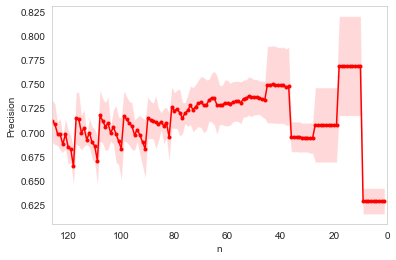

In [103]:
Prec_arr = model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(np.array(range(1, 127)), Prec_arr, 'r.-')
plt.fill_between(np.array(range(1, 127)), Prec_arr - std_arr, Prec_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(np.array(range(1, 127))), 0])
plt.grid()
plt.xlabel('n')
plt.ylabel('Precision')
plt.show()

Из графика видно, что лучшие результаты были получены на 10-20 попытках, на этом отрезке значение max_depth >= 2. Используем лучшие параметры для обучения модели.

In [104]:
tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=2, random_state=42)
tree.fit(X_train, y_train)

tree_train_pred = tree.predict(X_train)
tree_test_pred = tree.predict(X_test)

print("Train data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_train, tree_train_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_train, tree_train_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_train, tree_train_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_train, tree_train_pred), 4))

print("Test data: \n", 
     "Accuracy: ", np.round(accuracy_score(y_test, tree_test_pred), 4), "\n",
     "Recall: ", np.round(recall_score(y_test, tree_test_pred), 4), "\n",
     "Precision: ", np.round(precision_score(y_test, tree_test_pred), 4), "\n",
     "F1-score: ", np.round(f1_score(y_test, tree_test_pred), 4))

Train data: 
 Accuracy:  0.8143 
 Recall:  0.6431 
 Precision:  0.7309 
 F1-score:  0.6842
Test data: 
 Accuracy:  0.8202 
 Recall:  0.6479 
 Precision:  0.7453 
 F1-score:  0.6932


## Выводы:

Изначально в данных были признаки, которые не влияли на целевую переменную, и которые коррелировали между собой. С подборкой гиперпараметров значение метрики precision стало ниже, но это говорит о том, что модель стала лучше определять тех пользователей, которым понадобятся выплаты страховой компании. Можно было бы достичь лучших результатов при использовании случайного леса, но у этой модели есть тенденция к переобучению, так что с ней тоже понадобилась бы настройка гиперпараметров и использование дополнительных методов, уменьшающих риск переобучения.